In [1]:
# ショアのアルゴリズムを量子回路で構築するソースコード
# 必要なモジュールをインポート
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

In [2]:
def cmul_mod15(repetitions):
    U = QuantumCircuit(4)
    for i in range(repetitions):
        U.swap(3, 2)
        U.swap(2, 1)
        U.swap(1, 0)
    U = U.to_gate()
    c_U = U.control(1)
    return c_U

In [3]:
# 逆量子フーリエ変換
def qft_rotate_single_inv(circuit, i, n):
    if n == 0:
        return circuit
    for qubit in range(0, i):
        circuit.cp(-pi/2**(i - qubit), qubit, i)
    circuit.h(i)
        
def qft_dagger(circuit, n):
    for i in range(math.floor(n/2)):
        qc.swap(i, n - (i + 1))
    for i in range(n):
        qft_rotate_single_inv(circuit, i, n)

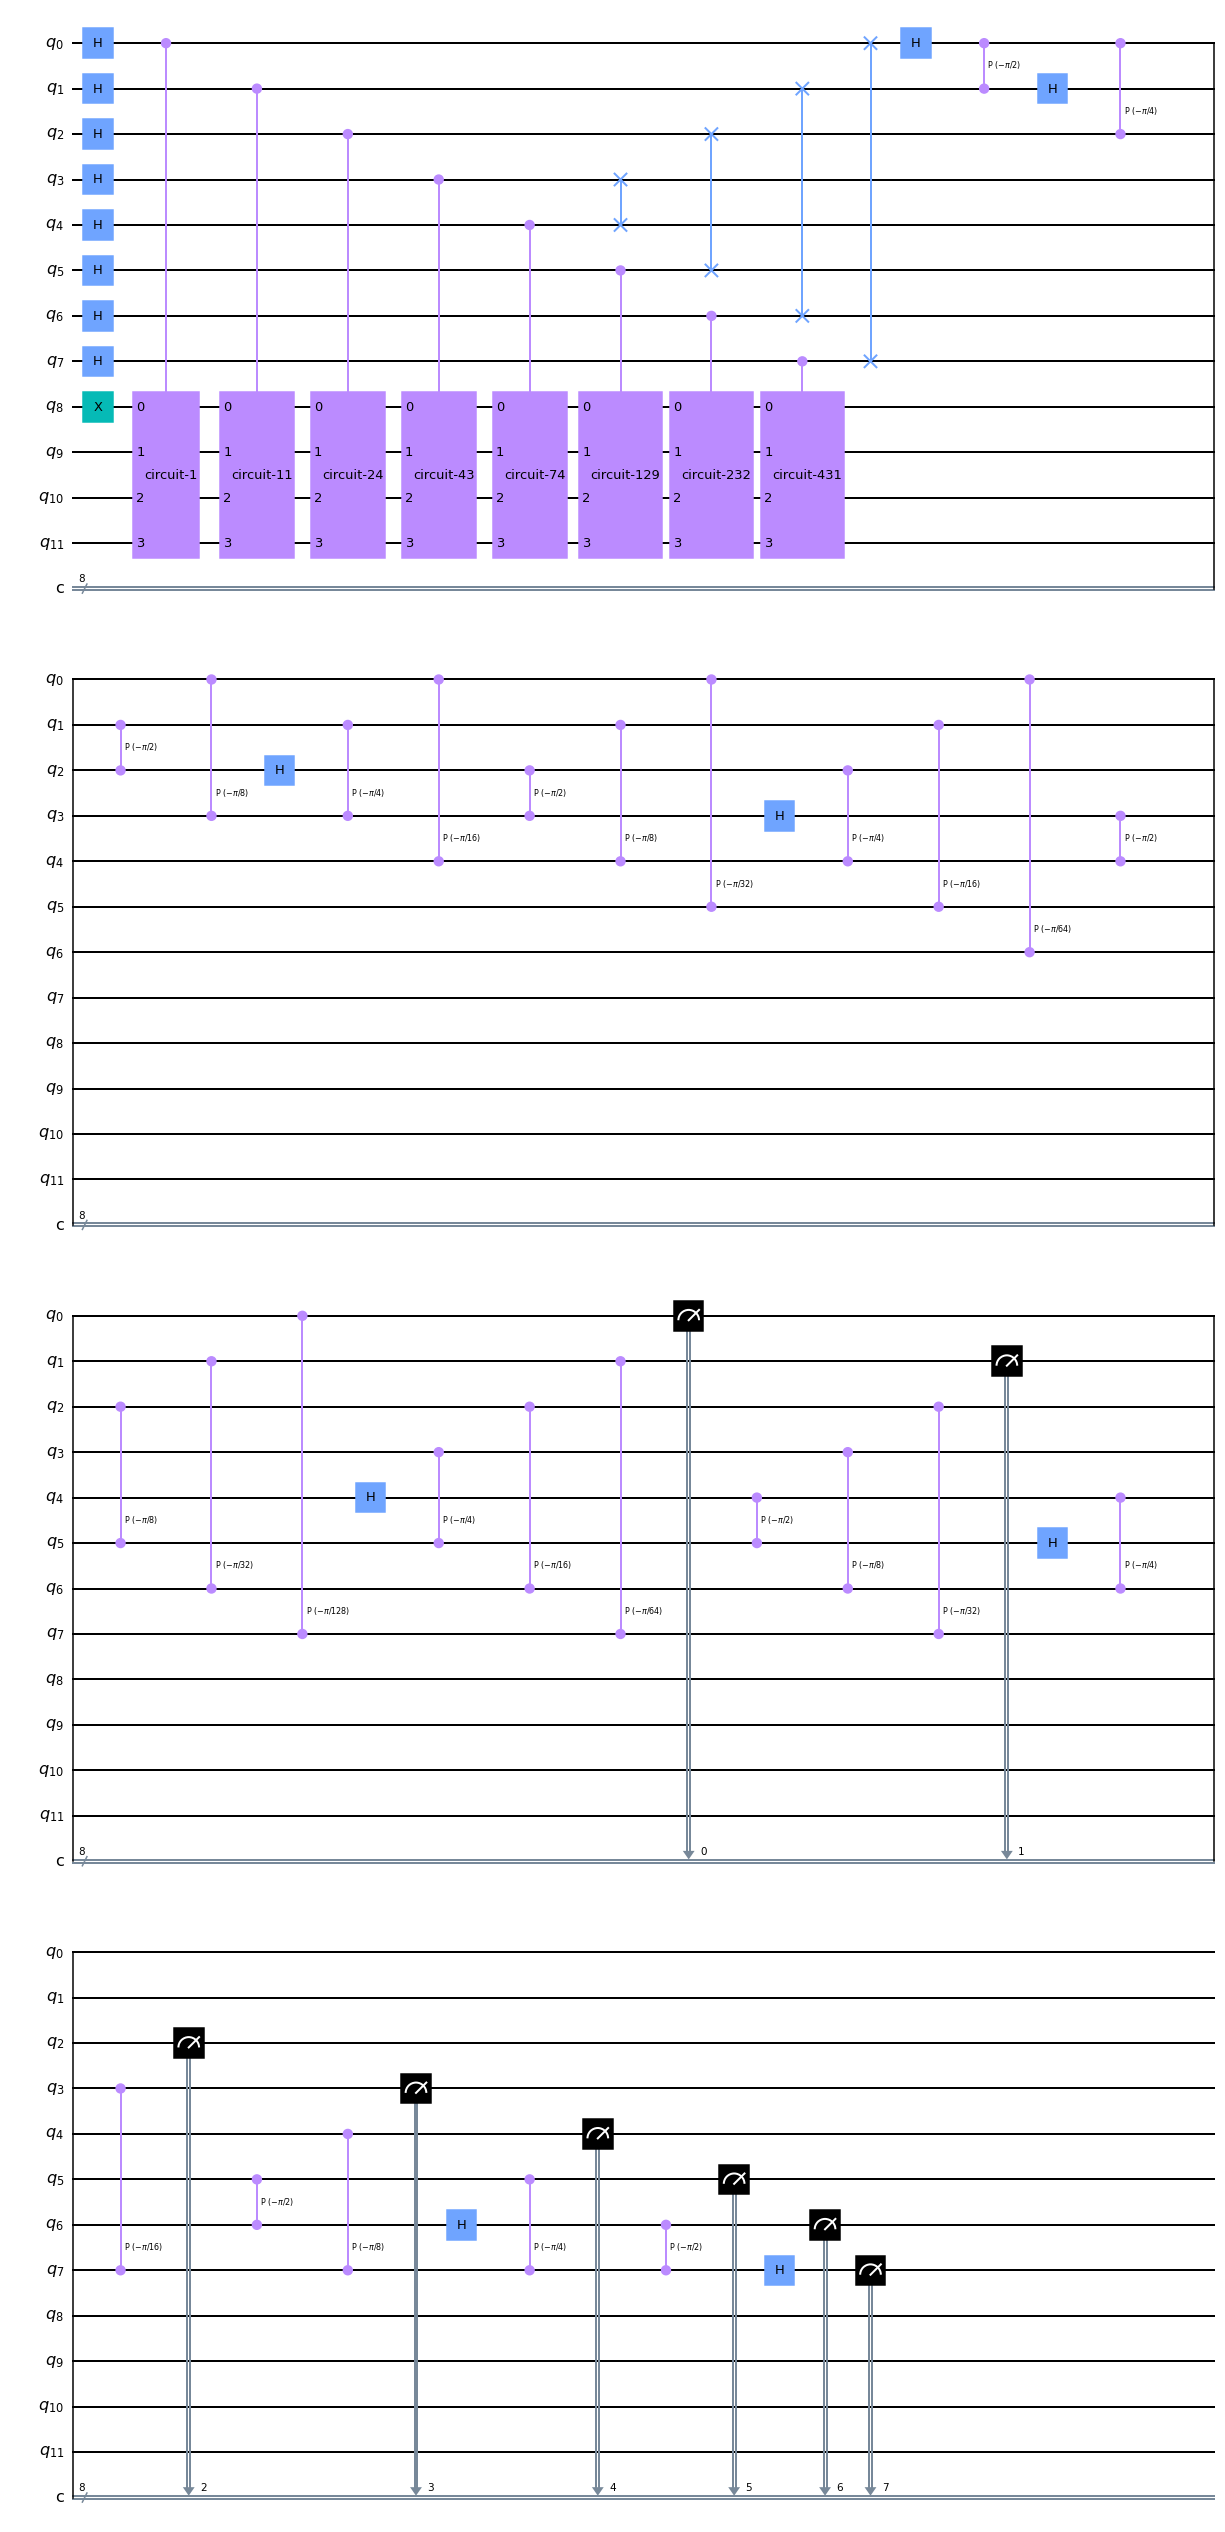

In [4]:
# アルゴリズムの本体
# 求めたい固有値の位相角をエンコードする量子ビット数
n_encode = 8 
# 固有状態の量子ビット数
n_eigstate = 4 
# 量子回路を生成
qc = QuantumCircuit(n_encode +n_eigstate , n_encode)
# アダマールゲートを適用する。
for i in range(n_encode):
    qc.h(i)    
qc.x(n_encode)

repetitions = 1
for count in range(n_encode):
    qc.append(cmul_mod15(repetitions), 
         [count] + [8, 9, 10, 11])
    repetitions *= 2
# 逆量子フーリエ変換
qft_dagger(qc, 8)
# 測定ゲートを適用する。
for i in range(n_encode):
    qc.measure(i,i)
# 量子回路を描画する。 
qc.draw(output='mpl')

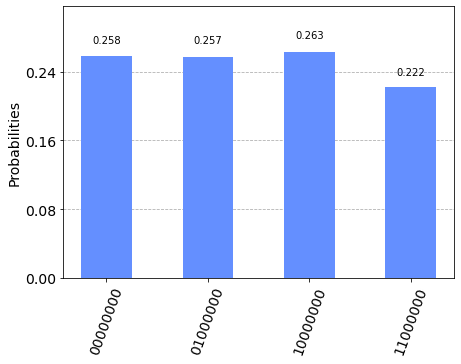

In [5]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
shots = 1042
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
# プロットする。
plot_histogram(answer)